# Assignment - 1
25/11/2021


### Bayes Theorem

#### Q1  In a study, physicians were asked what the odds of breast cancer would be in a woman who was initially thought to have a 1% risk of cancer but who ended up with a positive mammogram result (a mammogram accurately classifies about 80% of cancerous tumors and 90% of benign tumors.) 95 out of a hundred physicians estimated the probability of cancer to be about 75%. Do you agree?

In [87]:
# Introduction of events
# event P : manmogran result is positive
# event B : tumor is benign
# event M : tumor is malignant.
# note that not_B = M
#P(M)
p_M=0.01
#P(B)
p_B=1-0.01
#P(P/M)
p_P_given_M=0.80
#P(P/B)
p_P_given_B=0.10

def bayes_theorem(p_M, p_P_given_M, p_P_given_B):
  # calculate P(P)
  p_P = p_P_given_M * p_M + p_P_given_B * p_B
  # calculate P(M|P)
  p_M_given_P = (p_P_given_M * p_M) / p_P
  return p_M_given_P
# calculate P(M|P)
result = bayes_theorem(p_M, p_P_given_M, p_P_given_B)
# summarize
print('P(M|P) = %.1f%%' % (result * 100))
print("So the chance would be 7.5%. ")

P(M|P) = 7.5%
So the chance would be 7.5%. 


#### Q.2.  It is estimated that 50% of emails are spam emails. Some software has been applied to filter these spam emails before they reach your inbox. A certain brand of software claims that it can detect 99% of spam emails, and the probability for a false positive (a non-spam email detected as spam) is 5%. Now if an email is detected as spam, then what is the probability that it is in fact a non-spam email?

In [83]:
#B : event that an email is detected as spam,
#A : event that an email is spam,
#not_A : event that an email is not spam.

# calculate the probability of an email in the spam folder being non spam
# calculate P(not_A|B) given P(A),P(not_A), P(B|A), P(B|not A)
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
  # calculate P(not A)
  p_not_a = 1 - p_a
  # calculate P(B)
  p_b = p_b_given_a * p_a + p_b_given_not_a * p_not_a
  # calculate P(not_A|B)
  p_not_a_given_b = (p_b_given_not_a * p_not_a) / p_b
  return p_not_a_given_b

#P(A)
p_a = 0.5
# P(B|A)
p_b_given_a = 0.99
# P(B|not A)
p_b_given_not_a = 0.05
# calculate P(not_A|B)
result = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)
# summarize
print('P(not_A|B) = %.3f%%' % (result * 100))

P(not_A|B) = 4.808%


## 2. DISCRETE PROBABILITY DISTRIBUTIONS
### Binomial Distribution


In [2]:
import numpy as np
import pandas as pd
from numpy import random
from numpy.random import binomial
from numpy.random import multinomial
from numpy.random import poisson
from scipy.stats import binom
from scipy.stats import multinomial
from scipy.stats import poisson
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
# settings for seaborn plotting style
#sns.set(color_codes=True)

#### 1. Given 10 trials for coin toss generate 10 data points, plot the histogram. Find the moments of the distribution.

 data Points is : [3 5 5 5 6 1 5 4 3 8]


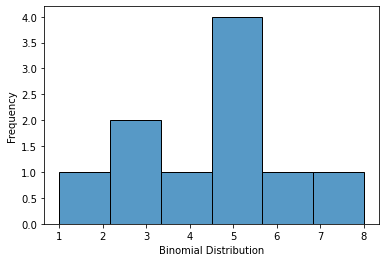

Mean=5.000, Variance=2.500, skew=0.000, kurt=-0.200


In [3]:
# n : number of trials =10
# p : prob of occurence of head or tail =0.5

# simulate data points
data_binom = random.binomial(n=10, p=0.5, size=10)
print(" data Points is :",data_binom)

# To display the histogram of the distribution
ax=sns.histplot(data_binom,kde=False,bins=6)
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')
plt.show()

# To calculate the moments of the distribution
mean, var, skew, kurt = binom.stats(n=10, p=0.5, moments='mvsk')
print('Mean=%.3f, Variance=%.3f, skew=%.3f, kurt=%.3f' % (mean, var, skew, kurt))

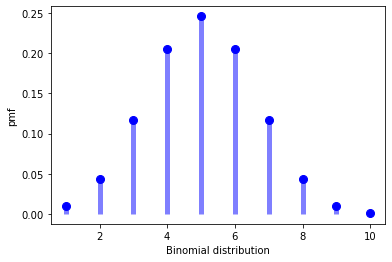

In [4]:
# define the parameters of the distribution
p = 0.5
n = 10

#PMF plotting using histogram
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p)+2)
plt.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
plt.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

plt.xlabel('Binomial distribution')
plt.ylabel('pmf')
plt.show()


Text(0, 0.5, 'cdf')

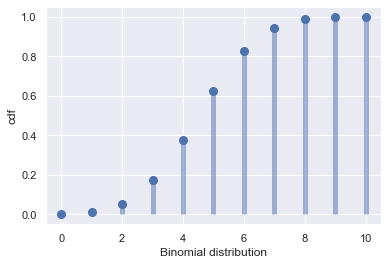

In [168]:
#CDF plotting using histogram
x = np.linspace(0, 10, 11)
plt.plot(x, stats.binom.cdf(x, n, p), 'bo', ms=8, label='binom cdf')
plt.vlines(x, 0, binom.cdf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.xlabel('Binomial distribution')
plt.ylabel('cdf')

#### Q.2 whenlooking at a person’s eye color, it turns out that 1% of people in the world has green eyes Consider a group of 20 people.

a. State the random variable.

b. Write the probability distribution.

c. Draw a histogram.

d. Find the mean.

e. Find the variance.

f. Find the standard deviation.

In [181]:
# ans A]---

# x = number of people with green eyes

# ans B]---
'''
There are 20 people, and each person is a trial,
so there are a fixed number of trials. In this case, n=20 .
each trials are independant.
'''
'''The probability of a person having green eyes is 0.01.
This is the same for every trial since each person has the same chance of having green eyes.
p = 0.01 and q = 1 - 0.01 = 0.99
'''
'''
here X~ Bin(n=20, p=0.01)
'''
n=20
p=0.01

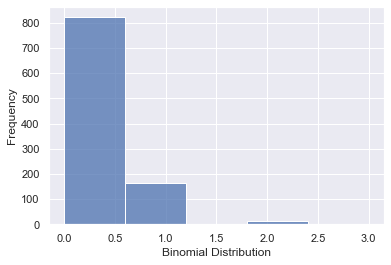

Mean=0.200, Variance=0.198, skew=2.202, kurt=4.751
standard deviation : 0.4449719092257398


In [189]:
# ans C]----
# simulate data points
data_binom = random.binomial(n, p, size=1000)
#print(" data Points is :",data_binom)

# To display the histogram of the distribution
ax=sns.histplot(data_binom,kde=False,bins=5)
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')
plt.show()

# ans D, E, F]----

# To calculate the moments of the distribution
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print('Mean=%.3f, Variance=%.3f, skew=%.3f, kurt=%.3f' % (mean, var, skew, kurt))
print("standard deviation :" ,np.sqrt(var))

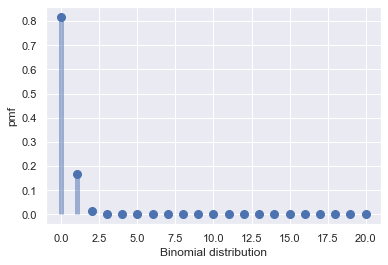

In [192]:
#PMF plotting using histogram
#x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p)+5)
x=list(np.arange(0,n+1,1))
plt.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
plt.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

plt.xlabel('Binomial distribution')
plt.ylabel('pmf')
plt.show()


Text(0, 0.5, 'cdf')

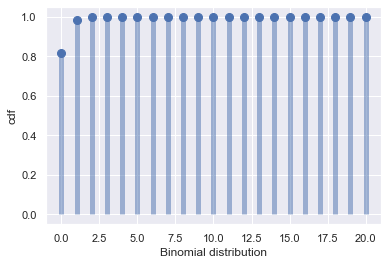

In [195]:
#CDF plotting using histogram
x = np.linspace(0, 20, 21)
plt.plot(x, stats.binom.cdf(x, n, p), 'bo', ms=8, label='binom cdf')
plt.vlines(x, 0, binom.cdf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.xlabel('Binomial distribution')
plt.ylabel('cdf')

#### Q.3. Nathan makes 60% of his free-throw attempts. If he shoots 12 free throws, what is the probability that he makes exactly 10?

In [202]:
# X=no of made free-throw attempts 
n=12    # n=no of free throws shoots
p=0.60 # 60% made free throw attempts

# probability that he makes exactly 10
p_x_10=binom.pmf(k=10, n=12, p=0.6)
print("probability that he makes exactly 10 is :", p_x_10)


probability that he makes exactly 10 is : 0.06385228185599987


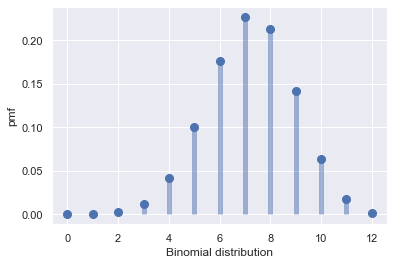

In [203]:
#PMF plotting using histogram
#x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p)+5)
x=list(np.arange(0,n+1,1))
plt.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
plt.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

plt.xlabel('Binomial distribution')
plt.ylabel('pmf')
plt.show()

Text(0, 0.5, 'cdf')

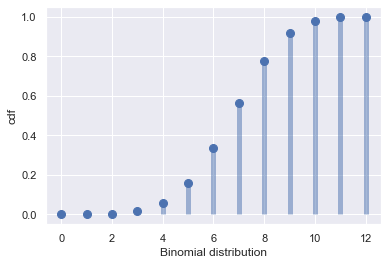

In [204]:
#CDF plotting using histogram
x = np.linspace(0, 12, 13)
plt.plot(x, stats.binom.cdf(x, n, p), 'bo', ms=8, label='binom cdf')
plt.vlines(x, 0, binom.cdf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.xlabel('Binomial distribution')
plt.ylabel('cdf')

#### Q.4  Approximately 10% of all people are left-handed. Consider a grouping of fifteen people.
a. State the random variable.

b. Write the probability distribution.

c. Draw a histogram.

d. Describe the shape of the histogram.

e. Find the mean.

f. Find the variance.

g. Find the standard deviation.

In [205]:
# ans A]---

# x = number of peoples are left handed

# ans B]---
'''
There are 15 people, and each person is a trial,
so there are a fixed number of trials. In this case, n=15.
each trials are independant.
'''
'''The probability of a person is left handed is 0.1
This is the same for every trial since each person has the same chance of left handed.
p = 0.1 and q = 1 - 0.1 = 0.9
'''
'''
here X~ Bin(n=15, p=0.1)
'''
n=15
p=0.1

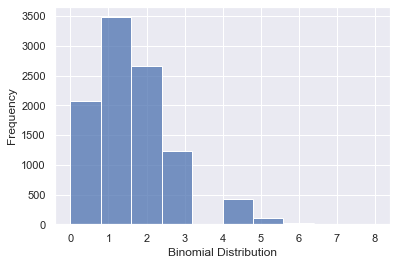

 shape of distribution is positively skewed and leptokurtic 
Mean=1.500, Variance=1.350, skew=0.689, kurt=0.341
standard deviation : 1.161895003862225


In [207]:
# ans C]----
# simulate data points
data_binom = random.binomial(n, p, size=10000)
#print(" data Points is :",data_binom)

# To display the histogram of the distribution
ax=sns.histplot(data_binom,kde=False,bins=10)
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')
plt.show()

# ans D]----

print(" shape of distribution is positively skewed and leptokurtic ")

# ans E, F, G]----

# To calculate the moments of the distribution
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
print('Mean=%.3f, Variance=%.3f, skew=%.3f, kurt=%.3f' % (mean, var, skew, kurt))
print("standard deviation :" ,np.sqrt(var))


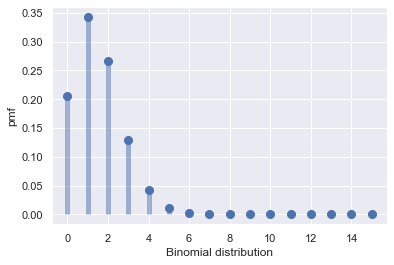

In [208]:
#PMF plotting using histogram
#x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p)+5)
x=list(np.arange(0,n+1,1))
plt.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
plt.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

plt.xlabel('Binomial distribution')
plt.ylabel('pmf')
plt.show()

Text(0, 0.5, 'cdf')

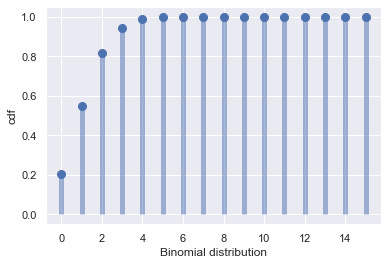

In [209]:
#CDF plotting using histogram
x = np.linspace(0, 15, 16)
plt.plot(x, stats.binom.cdf(x, n, p), 'bo', ms=8, label='binom cdf')
plt.vlines(x, 0, binom.cdf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.xlabel('Binomial distribution')
plt.ylabel('cdf')

## Multinomial Distribution

#### Q.5 Three card players play a series of matches. The probability that player A will win any game is 20%, the probability that player B will win is 30%, and the probability player Cwill win is 50%. If they play 6 games, what is the probability that player A will win 1 game, player B will win 2 games, and player C will win 3? (Calculate the success assuming each case information)

In [211]:
# define the parameters of the distribution
# k=6 no of games played
# p1=prob of player A is win is 0.20
# p2=prob of player B is win is 0.30
# p3=prob of player C is win is 0.50

p = [0.20, 0.30, 0.50]
k = 6
# define the distribution
dist = multinomial(k, p)
# define a specific number of outcomes from 6 trials
cases = [1, 2, 3]
# calculate the probability for the case
pr = dist.pmf(cases)
# print as a percentage
print('Case=%s,P(A=1,B=2,C=3) Probability: %.3f%%' % (cases, pr*100))

Case=[1, 2, 3],P(A=1,B=2,C=3) Probability: 13.500%


#### Q.6 You are given a bag of marbles. Inside the bag are 5 red marbles, 4 white marbles, and 3 blue marbles. Calculate the probability that with 6 trials, you choose 3 marbles that are red, 1 marble that is white, and 2 marbles that are blue, replacing each marble after it is chosen. Find the mean and variance of this distribution.

In [222]:
# n= no of marbles in bag =12
# p1 = prob of red marbles is selected =5/12
p1=5/12
# p2 = prob of white marbles is selected =4/12 
p2=4/12
# p3 = prob of blue marbles is selected =3/12
p3=3/12
p=[5.0/12.0, 4.0/12.0, 3.0/12.0]
k=6
# define the distribution
dist = multinomial(k, p)
cases=[3,1,2]
# calculate the probability for the case
pr = dist.pmf(cases)
# print as a percentage
print('Case=%s,P(R=3,W=1,B=2) Probability: %.3f%%' % (cases, pr*100))

Case=[3, 1, 2],P(R=3,W=1,B=2) Probability: 9.042%


In [227]:
# Mean 
mean_R=k*p1
mean_W=k*p2
mean_B=k*p3
print("means is :" ,[mean_R, mean_W,mean_B])
# Mean 
var_R=k*p1*(1-p1)
var_W=k*p2*(1-p2)
var_B=k*p3*(1-p3)
print("variance is :" ,[var_R, var_W,var_B])

means is : [2.5, 2.0, 1.5]
variance is : [1.458333333333333, 1.3333333333333335, 1.125]


## Poisson Distribution


#### Q.7 Let’s say that the number of buses that come on a bus stop in span of 30 minutes is 1. Poisson distribution can be used to model the probability of different number of buses, X, coming to the bus stop within the next 30 minutes where X can take value of 0, 1, 2, 3, 4. Show the distribution by using histogram plotting.

In [244]:
#Random variable representing number of buses
# Mean number of buses coming to bus stop in 30 minutes is 1

X = [0, 1, 2, 3, 4]
lmbda = 1
# Probability values
poisson_pd = poisson.pmf(X, lmbda)
poisson_pd

array([0.36787944, 0.36787944, 0.18393972, 0.06131324, 0.01532831])

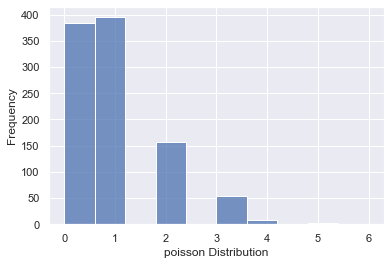

Mean=1.000, Variance=1.000, skew=1.000, kurt=1.000


In [245]:
data_poission = poisson.rvs(mu=1, size=1000)
ax=sns.histplot(data_poission,kde=False,bins=10)
ax.set(xlabel='poisson Distribution', ylabel='Frequency')
plt.show()
# CALCULATION OF MOMENTS OF POISSION DISTRIBUTION
mean, var, skew, kurt = poisson.stats(mu=1, moments='mvsk')
print('Mean=%.3f, Variance=%.3f, skew=%.3f, kurt=%.3f' % (mean, var, skew, kurt))

#### Q.8 Let’s say that you are out on a long drive. The rate of occurrences of good restaurants a range of 10 miles (or km) is 2. In other words, the mean number of occurrences of restaurants in a range of 10 KM or miles is 2.
a. Identify the parameters of the distribution and plot the same

b. What is the probability that 0, 1, 2, 3, 4, or 5 restaurants will occur in the next 10 km.? Show the pmf of the distribution.

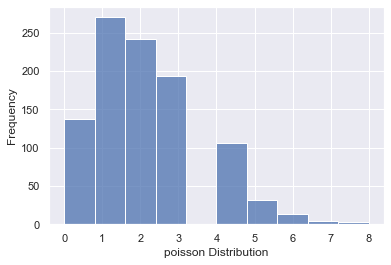

In [247]:
#Random variable( X ) representing number of occurence of good restaurant in range of 10km
# Mean number of occurence of good restaurant in range of 10km is 2

# ans a]--
# parameter is lambda
lmbda=2
data_poission = poisson.rvs(mu=2, size=1000)
ax=sns.histplot(data_poission,kde=False,bins=10)
ax.set(xlabel='poisson Distribution', ylabel='Frequency')
plt.show()



In [249]:
# ans b]---
X = [0, 1, 2, 3, 4, 5]
mu = 2
# Probability values
poisson_pd = poisson.pmf(X, mu)
poisson_pd


array([0.13533528, 0.27067057, 0.27067057, 0.18044704, 0.09022352,
       0.03608941])

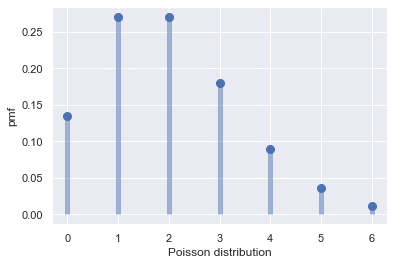

In [254]:
#PMF plotting using histogram
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu)+1)
plt.plot(x, poisson.pmf(x, mu) , 'bo', ms=8, label='poisson pmf')
plt.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.xlabel('Poisson distribution')
plt.ylabel('pmf')
plt.show()

## CONTINUOUS PROBABILITY DISTRIBUTIONS

### Normal Distribution

In [255]:
import numpy as np
from scipy.stats import norm
from numpy.random import exponential
from scipy.stats import expon
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

#### Q.1 Create a normal distribution with mean = 40, standard deviation = 45. Create the random sample points and plot the histogram.

40.09728877207914

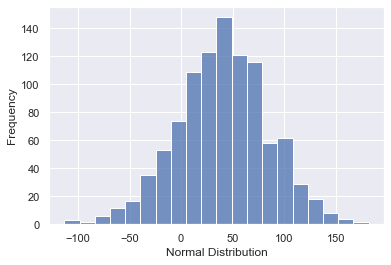

In [261]:
data_normal = np.random.normal(40,45,1000)
ax=sns.histplot(data_normal,kde=False,bins=20)
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
np.mean(data_normal)

#### Q.2. The average number of acres burned by forest and range fires in a large New Mexico county is 4,300 acres per year, with a standard deviation of 750 acres. The distribution of the number of acres burned is normal.
a. What is the probability that between 2,500 and 4,200 acres will be burned in
any given year?

b. Find the moments of the distribution

c. Also calculate number of burnt acres corresponds to the 38th percentile?

In [266]:
mean=4300
sd=750
# ans a]---
prob=norm.cdf(4200,mean,sd)-norm.cdf(2500,mean,sd)
prob

0.43876734745178986

In [267]:
# ans b]---
#moments of the normal distribution
mean, var, skew, kurt = norm.stats(mean, sd, moments='mvsk')
print('Mean=%.3f, Variance=%.3f, skew=%.3f, kurt=%.3f' % (mean, var, skew, kurt))

Mean=4300.000, Variance=562500.000, skew=0.000, kurt=0.000


In [271]:
# ans c]---
x=norm.ppf(0.38,mean,sd)
print("number of burnt acres corresponds to the 38th percentile is :",x )

number of burnt acres corresponds to the 38th percentile is : 4070.889408925452


#### Q.3 For a certain type of computers, the length of time between charges of the battery is normally distributed with a mean of 50 hours and a standard deviation of 15 hours.John owns one of these computers and wants to know the probability that the length of time will be between 50 and 70 hours.

In [273]:
mean=50
sd=15
prob=norm.cdf(70,mean,sd)-norm.cdf(50,mean,sd)
prob
print("probability of the length of time will be between 50 and 70 hours is :",prob)

probability of the length of time will be between 50 and 70 hours is : 0.4087887802741321


## Exponential Distribution


#### Q.4 The number of miles that a particular car can run before its battery wears out is exponentially distributed with an average of 10,000 miles. The owner of the car needs to take a 5000-mile trip. What is the probability that he will be able to complete the trip without having to replace the car battery?

In [280]:
mean=10000
# create distribution
dist = expon(mean)
# p(x>5000)=1-p(x<5000)
prob=1-(1-np.exp(-5000/mean))
prob

0.6065306597126334

[Text(0.5, 0, 'Exponential Distribution'), Text(0, 0.5, 'Frequency')]

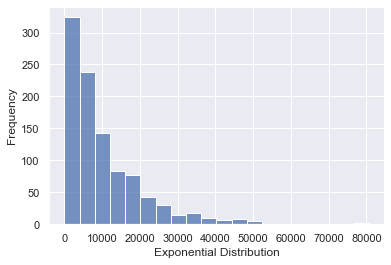

In [284]:
# define the distribution
beta = 10000
n = 1000
# generate the sample
sample = exponential(beta, n)
#histogram plotting of data distribution
exp=sns.histplot(sample,kde=False,bins=20)
exp.set(xlabel='Exponential Distribution', ylabel='Frequency')


#### Q.5 Students arrive at a local bar and restaurant according to an approximate Poisson process at a mean rate of 30 students per hour. What is the probability that the bouncer has to wait more than 3 minutes to card the next student?

In [285]:
# X equal the number of students
#then the Poisson mean is 30 students per 60 minutes, means (lambda) 1/2 students per minutes
# W  denote the (waiting) time between students, theta=1/lambda=2 minutes between arriving students
# W follows exponential distribution with mean theta=2
# f(w)=(1/theta)*exp(-w/theta)
# cdf F(t)=P(W<t)=1-exp(-t/theta)
# probability of the bouncer has to wait more than 3 minutes to card the next student :
#P(W>3)=1-P(W<3)=1-(1-exp(-3/2))= exp(-3/2)
prob=np.exp(-3/2)
prob


0.22313016014842982

#### Q.6 On the average, a certain computer part lasts ten years. The length of time the computer part lasts is exponentially distributed. What is the probability that a computer part lasts more than 7 years? (Plot the cdf graph)

In [286]:
# x = the amount of time (in years) a computer part lasts.
# theta=10
# X ~ exp (mean=10)
# P(X>7)=1-F(7)=1-(1-exp(-7/10))
prob=np.exp(-7/10)
prob

0.4965853037914095

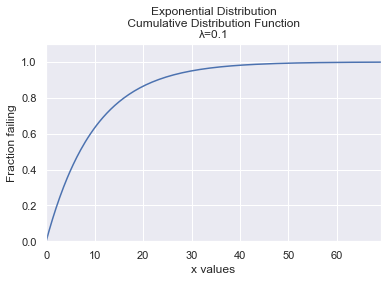

In [315]:
from reliability.Distributions import Exponential_Distribution
import matplotlib.pyplot as plt

dist = Exponential_Distribution(1/theta)  # this created the distribution object
dist.CDF()  # this creates the plot of the CDF
plt.show()


## Uniform Distribution


In [316]:
from scipy.stats import uniform

#### Q.7 The time between arrivals of customers at a bank during the 12 PM - 1 PM hour has a uniform distribution between 0 to 120 seconds.

a. What is the probability that the time between the arrival of two customers will
be less than 20 seconds?

b. What is the probability that the time between the arrival of two customers will
be between 10 and 30 seconds?

c. What is the probability that the time between the arrival of two customers will
be more than 35 seconds?

d. What are the mean and standard deviation of the time between arrivals?

In [319]:
# X determines the number of seconds that is incurred in arrival of two customers
# X~ Uniform(0,120)
#X~ U(a,b)  f(x)=(a+b)/2     F(x)=P(X<x)=(x-a)/(b-a)
unifo=uniform(0,120)
#ans a]---
#P(X<20)
prob1=unifo.cdf(20)
prob1
print("The probability that the time deviation between arrival of two customers is less than 20 seconds is :", prob1)

The probability that the time deviation between arrival of two customers is less than 20 seconds is : 0.16666666666666666


In [321]:
#ans b]---
#P(10<x<30)
prob2=unifo.cdf(30)-unifo.cdf(10)
prob2
print("The probability that the difference between two customers' arrival can lie within the range of 10 and 30 seconds is : ",prob2)

The probability that the difference between two customers' arrival can lie within the range of 10 and 30 seconds is :  0.16666666666666669


In [323]:
#ans c]---
#P(X>35)
prob3=1-unifo.cdf(35)
prob3
print("The probability that more than 35 seconds can be taken between the arrival of two customers is :",prob3)

The probability that more than 35 seconds can be taken between the arrival of two customers is : 0.7083333333333333


In [327]:
# ansc D]---
# mean=E(X)=(a+b)/2
#var=E(x-xbar)^2=(b-a)^2/12
#sd=sqrt(var)
mean=(0+120)/2
var=(120-0)**2/12
sd=np.sqrt(var)
print(" mean : ",mean)
print("standard deviation :",sd )

 mean :  60.0
standard deviation : 34.64101615137755


#### Q.8. The current (in mA) is measured in a piece of copper wire is known to follow a uniform distribution over the interval [0,25]. Write down the formula for the probability density function f(x) of the random variable X representing the current. Calculate the mean and variance of the distribution and find the cumulative distribution function F(x).

In [328]:
# X ~ U ( a=0, b=25 )
# f(x)=1/(a+b)=1/(0+25)
#     = 0.04 for 0<=x<=25
#     = 0     for O.W
# mean=E(x)=(a+b)/2=(25)/2
mean=25/2
# var= (b-a)^2/12 = (25-0)^2/12
var=(25-0)**2/12
print(" mean : ",mean)
print("Variance :",var )

 mean :  12.5
Variance : 52.083333333333336


In [ ]:
#CDF
# CDF= F(x)=P(X<x)=  0         for x<0
#                    x/(25)    for 0<=x<=25
#                     1        for  X>=25



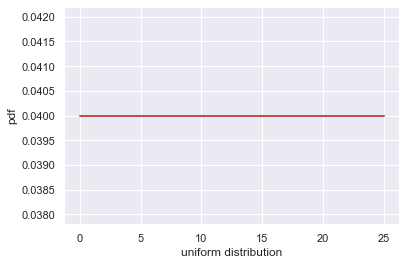

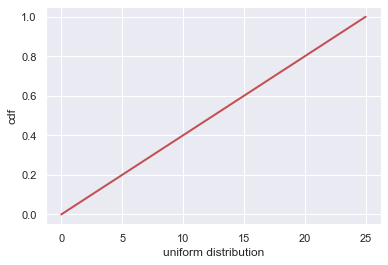

In [330]:
# Genrating uniform distribution
a=0
b=25
size=100
uniform_distribution = uniform(loc=a, scale=b)
x = np.linspace(uniform_distribution.ppf(0), uniform_distribution.ppf(1), size)

# Plotting pdf
plt.plot(x, uniform_distribution.pdf(x), 'r-', lw=2, alpha=1, label='pdf')
plt.xlabel('uniform distribution')
plt.ylabel("pdf")
plt.show()

# Plotting cdf
plt.plot(x, uniform_distribution.cdf(x), 'r-', lw=2, alpha=1, label='pdf')
plt.xlabel('uniform distribution')
plt.ylabel("cdf")
plt.show()

#### Q.9. The amount of time, in minutes, that a person must wait for a bus is uniformlydistributed between zero and 15 minutes, inclusive.

a. What is the probability that a person waits fewer than 12.5 minutes?

b. On the average, how long must a person wait? Find the mean, μ, and the
standard deviation, σ.

c. Ninety percent of the time, the time a person must wait falls below what
value? This asks for the 90th percentile

In [332]:
#  X= the number of minutes a person must wait for a bus.
# X ~ U (a=0 , b=15)
unif=uniform(0,15)

# ans a]---
# P(X<12.5)
prob1= unif.cdf(12.5)
prob1
print( " probability that a person waits fewer than 12.5 minutes is :", prob1)

 probability that a person waits fewer than 12.5 minutes is : 0.8333333333333334


In [336]:
# ans b]---
# E(x)=(a+b)/2
# var=(b-a)^2/12
mean=(0+15)/2
var=(15-0)**2/12
sd=np.sqrt(var)
print(" On the average, a person must wait",mean," minutes")
print(" The Standard deviation is", sd ," minutes.")

 On the average, a person must wait 7.5  minutes
 The Standard deviation is 4.330127018922194  minutes.


In [338]:
# ans c]---

# The 90th percentile
x=unif.ppf(0.90)
print("Ninety percent of the time, a person must wait at most ",x," minutes")

Ninety percent of the time, a person must wait at most  13.5  minutes


#### Q.10. . Suppose the time it takes a student to finish a quiz is uniformly distributed between six and 15 minutes, inclusive. Let X = the time, in minutes, it takes a student to finish a quiz. Then X ~ U (6, 15).

a. Find the probability that a randomly selected student needs at least eight
minutes to complete the quiz. Then find the probability that a different student
needs at least eight minutes to finish the quiz given that she has already taken
more than seven minutes

In [341]:
# X = the time, in minutes, it takes a student to finish a quiz.
# X ~ U (a=6 , b=15)
unif=uniform(6,15)
# ans a]---
# P(X>8)
prob1=1-unif.cdf(8)
prob1

0.8666666666666667

In [342]:
# P(X>8/X>7)=P(X>8 and X>7)/P(X>7)
#           = P(X>8)/P(X>7)
prob2=(1-unif.cdf(8))/(1-unif.cdf(7))
prob2


0.9285714285714286